In [3]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)
train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2)

train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [4]:
from tensorflow import keras

model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model3.summary()

In [5]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)

model3.compile(optimizer=rmsprop, loss='binary_crossentropy',
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('h5/best-2rnn-model.h5',
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model3.fit(train_seq, train_target, epochs=100, batch_size=64,
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
313/313 [==============================] - 12s 31ms/step - loss: 0.6926 - accuracy: 0.5369 - val_loss: 0.6920 - val_accuracy: 0.5806
Epoch 2/100
  3/313 [..............................] - ETA: 8s - loss: 0.6919 - accuracy: 0.5938 

C:\Users\gyeol\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


313/313 [==============================] - 9s 29ms/step - loss: 0.6902 - accuracy: 0.5900 - val_loss: 0.6876 - val_accuracy: 0.5918
Epoch 3/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6778 - accuracy: 0.6403 - val_loss: 0.6601 - val_accuracy: 0.6766
Epoch 4/100
313/313 [==============================] - 9s 28ms/step - loss: 0.6210 - accuracy: 0.6885 - val_loss: 0.5764 - val_accuracy: 0.7138
Epoch 5/100
313/313 [==============================] - 9s 28ms/step - loss: 0.5576 - accuracy: 0.7229 - val_loss: 0.5411 - val_accuracy: 0.7374
Epoch 6/100
313/313 [==============================] - 9s 29ms/step - loss: 0.5317 - accuracy: 0.7418 - val_loss: 0.5219 - val_accuracy: 0.7476
Epoch 7/100
313/313 [==============================] - 9s 29ms/step - loss: 0.5134 - accuracy: 0.7541 - val_loss: 0.5095 - val_accuracy: 0.7596
Epoch 8/100
313/313 [==============================] - 9s 28ms/step - loss: 0.4986 - accuracy: 0.7675 - val_loss: 0.4970 - val_accuracy: 0.7682
Epoc

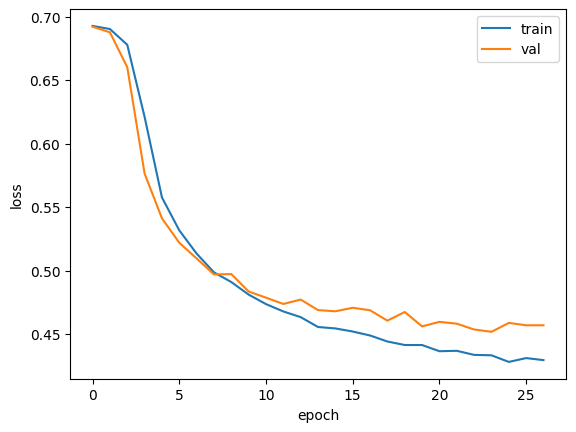

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [7]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('h5/best-2rnn-model.h5')
rnn_model.evaluate(test_seq, test_target)

782/782 [==============================] - 5s 6ms/step - loss: 0.4357 - accuracy: 0.7968


[0.43570825457572937, 0.7968400120735168]